In [1]:
from biosppy.signals import ecg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
#ecg_data_file = '/dscrhome/yq59/data/iBeat/eplab/Subject40_data.hdf'
ecg_data_file = 'D:/data/iBeat/eplab/Subject70_data.hdf'
ecg_data = pd.read_hdf(ecg_data_file,'eplab')

KeyboardInterrupt: 

In [3]:
ecg_data.columns

Index(['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5',
       'V6', 'utc', 'section', 'utc_adjusted'],
      dtype='object')

## Section begin & end time

### Note that the section number is not arranged in order!

In [30]:
section_num =[]
for section in ecg_data.section.unique():
    section_num.append(section)
section_num

[0.0,
 1.0,
 2.0,
 4.0,
 3.0,
 5.0,
 7.0,
 6.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0]

In [31]:
time_b = []
time_e = []
for section in ecg_data.section.unique():
    time_b.append(min(ecg_data.utc_adjusted[ecg_data.section == section]))
    time_e.append(max(ecg_data.utc_adjusted[ecg_data.section == section]))
time_b[:5]
#time_e    

[1532446262.0, 1532446327.0, 1532449974.0, 1532450885.0, 1532450951.0]

In [32]:
SR = 976.942
major_ticks = np.arange(0, 12, 1)
minor_ticks = np.arange(0, 12, 0.2)

## Visualize first x chunks

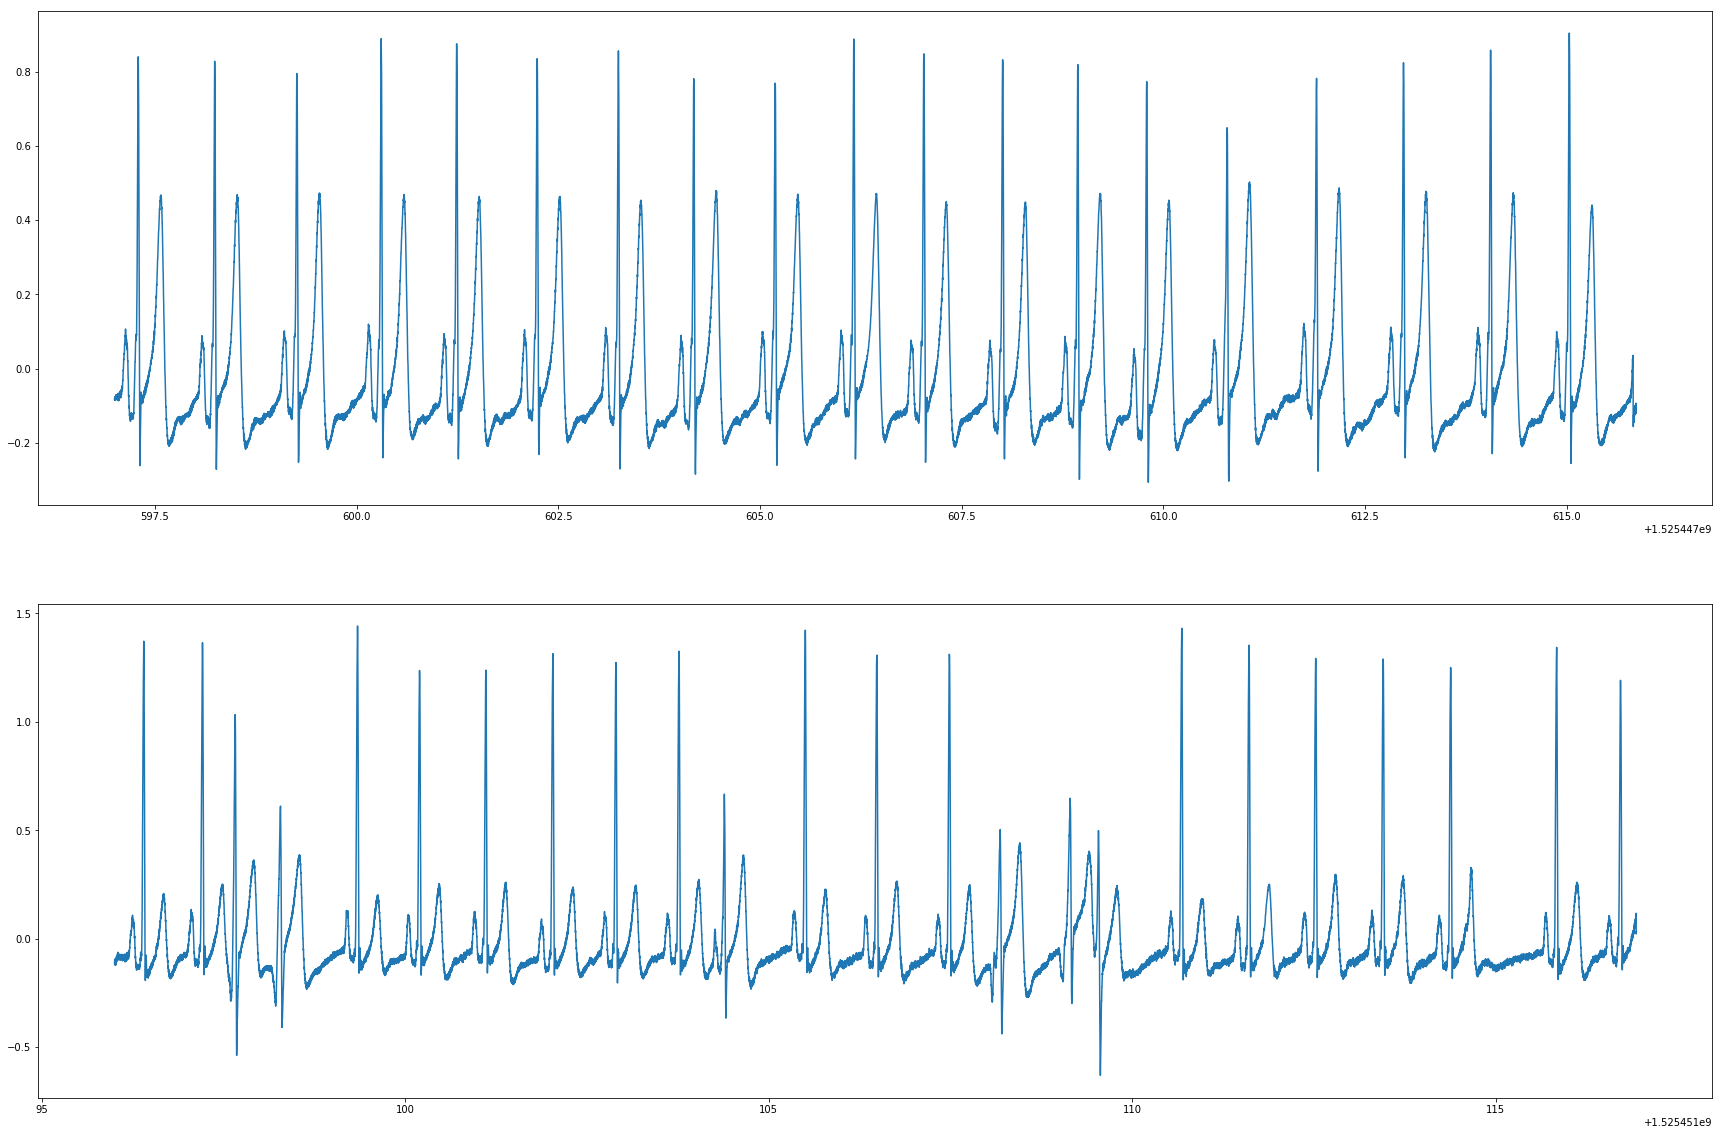

In [49]:
# subplot_num = 2
# # subplot_num: how many sections you want

# fig, ax = plt.subplots(subplot_num, 1, sharex=False, figsize=(30, 20))

# for i in range(subplot_num):
#     sec = section_num[i]
    
#     #out = ecg.ecg(signal=ecg_data.II[ecg_data.section == sec], sampling_rate=SR,show = False)
#     #ecg_sig_II = out['filtered']

#     ax[i].plot(ecg_data.utc_adjusted[ecg_data.section == sec], ecg_data.II[ecg_data.section == sec])

#     #ax[i].plot(ecg_data.utc_adjusted[ecg_data.section == sec], ecg_sig_II)

In [56]:
ts = time_b[2]+26
te = ts+12
print(ts)

1532450000.0


## go through 12 sec window

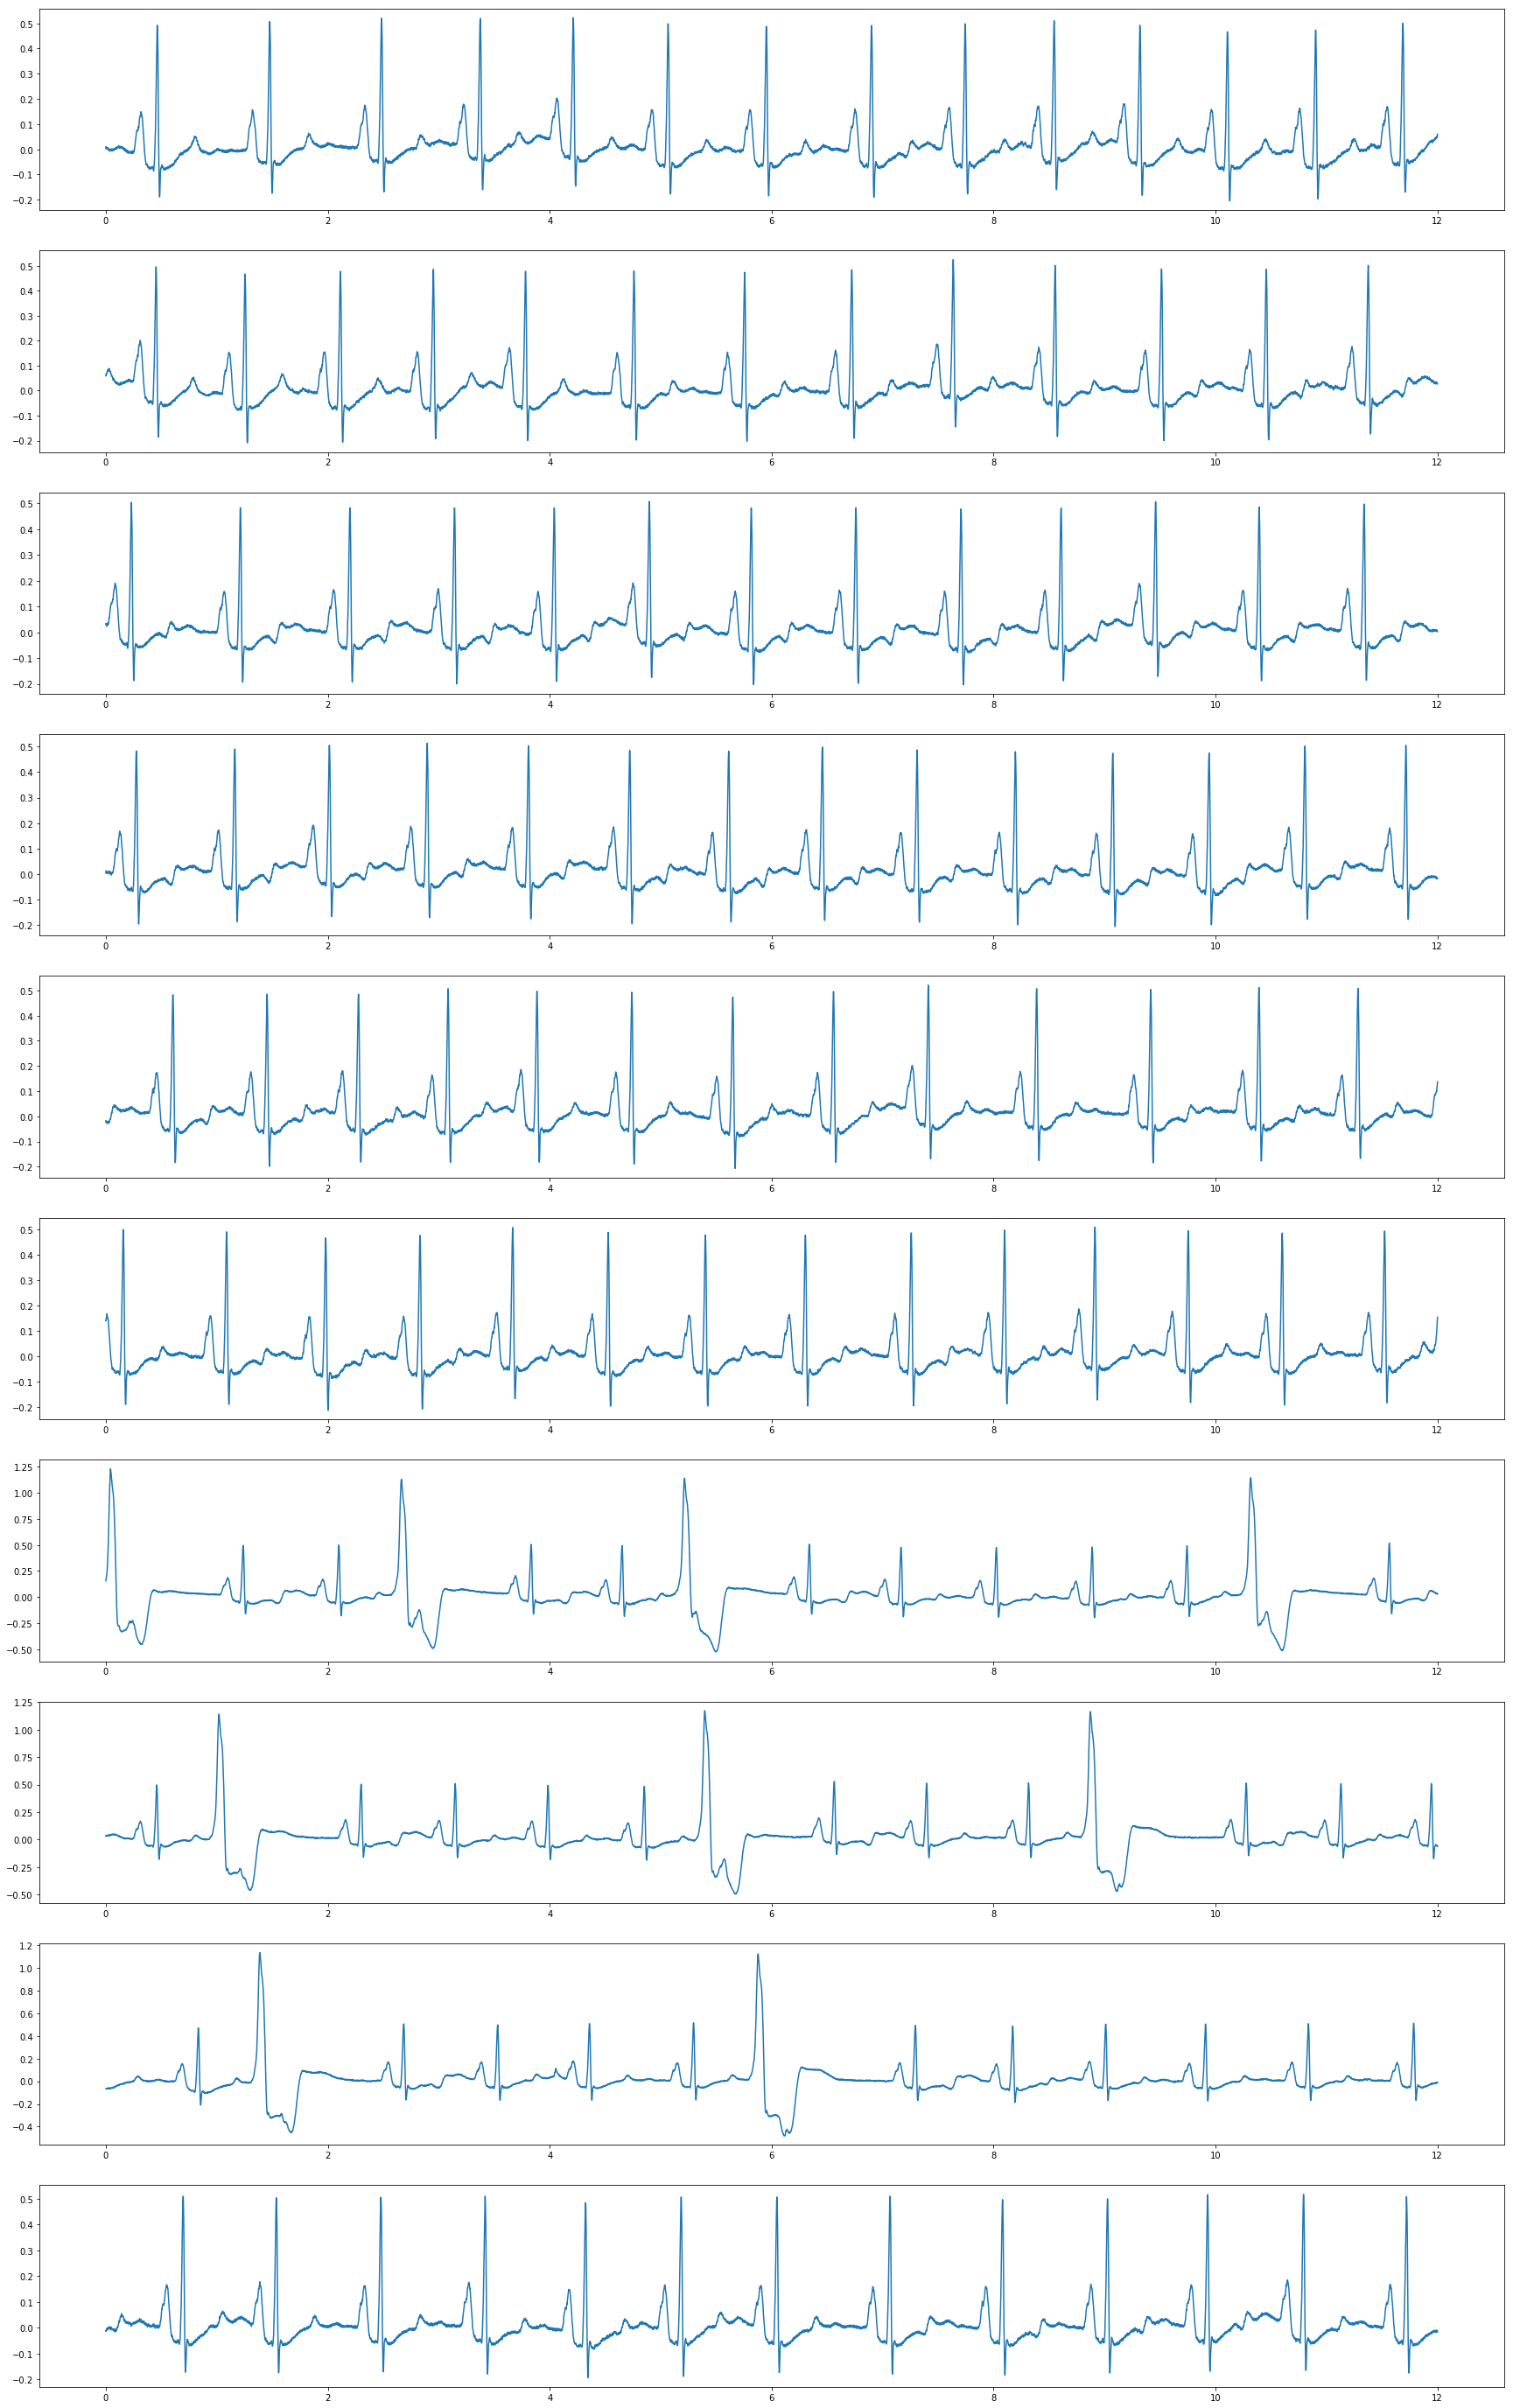

In [57]:
window = 10
fig, ax = plt.subplots(window, 1, sharex=False, figsize=(30, window*5))
for i in range(window):
    locals()['data'+str(i)] = ecg_data.II[(ecg_data.utc_adjusted < (te+i*12)) & (ecg_data.utc_adjusted > (ts+i*12))]
    locals()['time'+str(i)] = np.linspace(0,12,num = len(locals()['data'+str(i)]))
    ax[i].plot(locals()['time'+str(i)],locals()['data'+str(i)])

# 12 lead plot

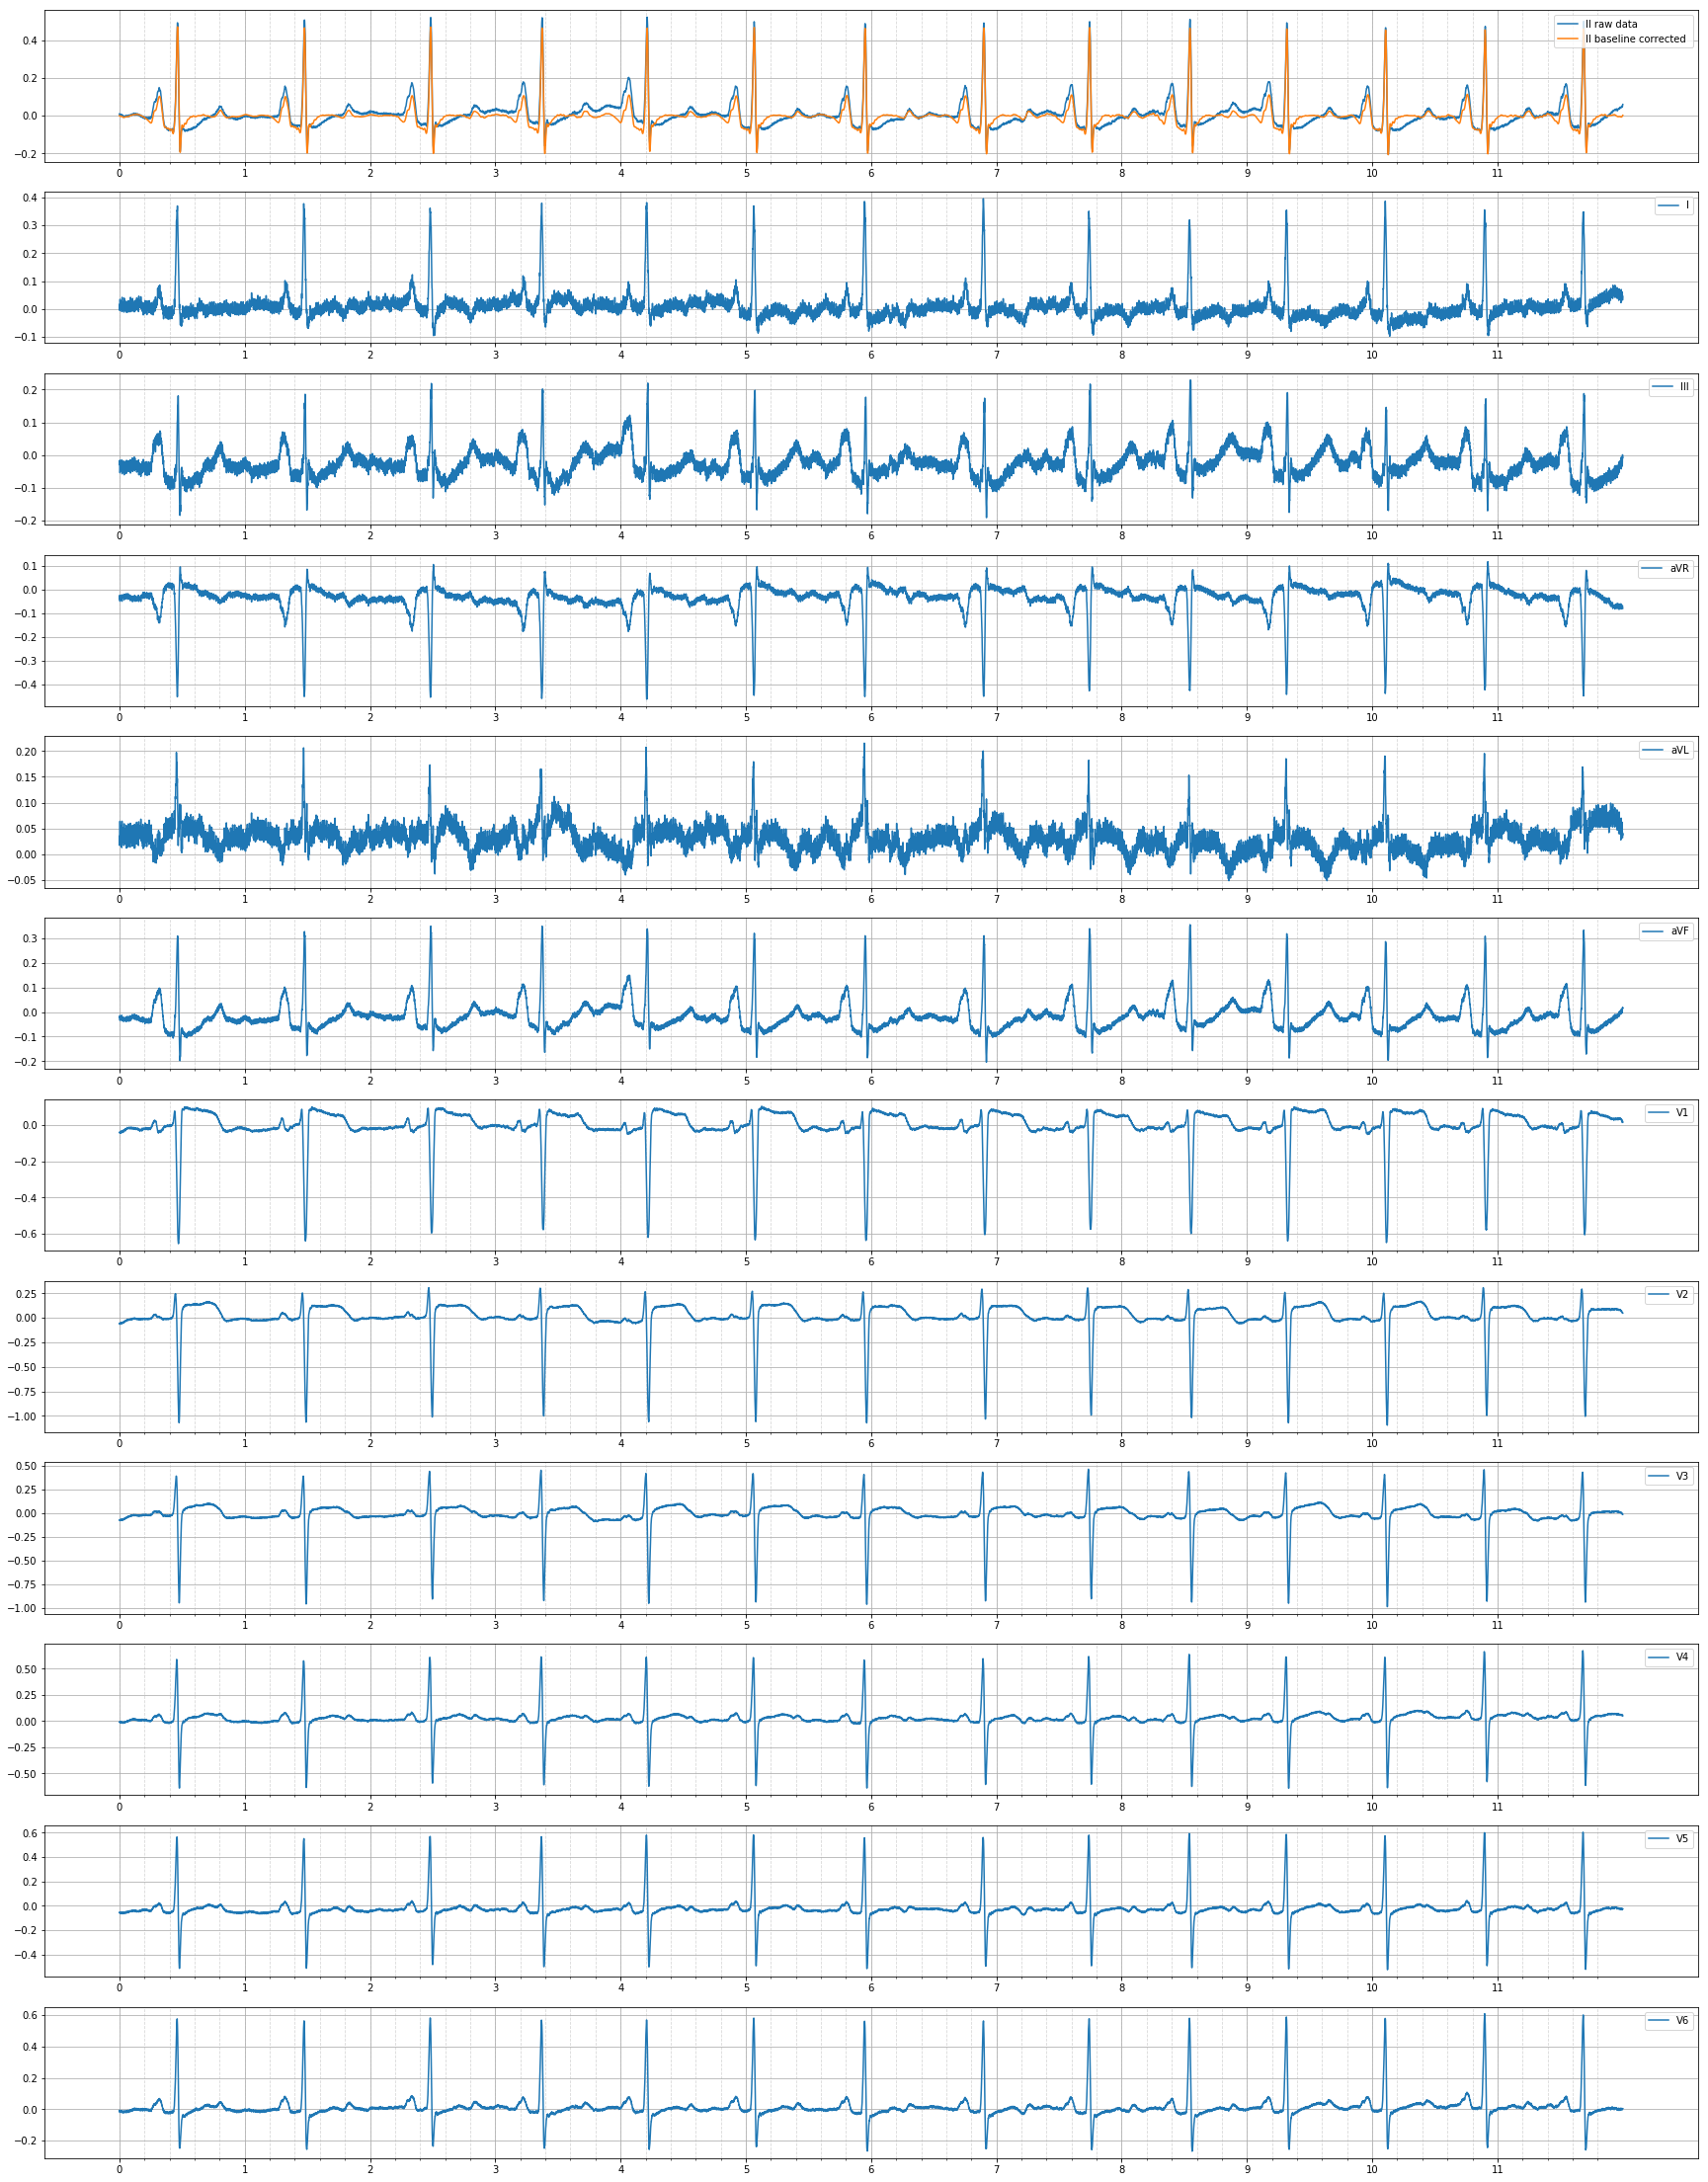

In [58]:
out = ecg.ecg(signal=ecg_data.II[(ecg_data.utc_adjusted < te) & (ecg_data.utc_adjusted > ts)], sampling_rate=SR,show = False)
ecg_sig_II = out['filtered']
time = np.linspace(0,12,num = len(ecg_sig_II))

fig, ax = plt.subplots(12, 1, sharex=False, figsize=(30, 40))

ax[0].plot(time, ecg_data.II[(ecg_data.utc_adjusted < te) & (ecg_data.utc_adjusted > ts)],label = 'II raw data')

ax[0].plot(time, ecg_sig_II,label = 'II baseline corrected ')
ax[1].plot(time, ecg_data.I[(ecg_data.utc_adjusted < te) & (ecg_data.utc_adjusted > ts)])
ax[2].plot(time, ecg_data.III[(ecg_data.utc_adjusted < te) & (ecg_data.utc_adjusted > ts)])
ax[3].plot(time, ecg_data.aVR[(ecg_data.utc_adjusted < te) & (ecg_data.utc_adjusted > ts)])
ax[4].plot(time, ecg_data.aVL[(ecg_data.utc_adjusted < te) & (ecg_data.utc_adjusted > ts)])
ax[5].plot(time, ecg_data.aVF[(ecg_data.utc_adjusted < te) & (ecg_data.utc_adjusted > ts)])
ax[6].plot(time, ecg_data.V1[(ecg_data.utc_adjusted < te) & (ecg_data.utc_adjusted > ts)])
ax[7].plot(time, ecg_data.V2[(ecg_data.utc_adjusted < te) & (ecg_data.utc_adjusted > ts)])
ax[8].plot(time, ecg_data.V3[(ecg_data.utc_adjusted < te) & (ecg_data.utc_adjusted > ts)])
ax[9].plot(time, ecg_data.V4[(ecg_data.utc_adjusted < te) & (ecg_data.utc_adjusted > ts)])
ax[10].plot(time, ecg_data.V5[(ecg_data.utc_adjusted < te) & (ecg_data.utc_adjusted > ts)])
ax[11].plot(time, ecg_data.V6[(ecg_data.utc_adjusted < te) & (ecg_data.utc_adjusted > ts)])

for i in range(12):
    ax[i].legend(loc = 1)
    ax[i].set_xticks(major_ticks)
    ax[i].set_xticks(minor_ticks, minor=True)
    ax[i].grid(which='minor', alpha=0.5, linestyle='--')
    ax[i].grid(which='major', alpha=1, linestyle='-')
    
plt.savefig("D:/data/ECG strips/first 12 sec/70.png")

11 (ecg_data.utc_adjusted < 1524077763) & (ecg_data.utc_adjusted > 1524077751)
12 (ecg_data.utc_adjusted < 1524156444) & (ecg_data.utc_adjusted > 1524156432)
13 (ecg_data.utc_adjusted < 1524156042) & (ecg_data.utc_adjusted > 1524156030)
15 (ecg_data.utc_adjusted < 1524238282) & (ecg_data.utc_adjusted > 1524238270)
17
31 (ecg_data.utc_adjusted < 1525277062) & (ecg_data.utc_adjusted > 1525277050)
37 (ecg_data.utc_adjusted < 1526323639) & (ecg_data.utc_adjusted > 1526323627)
38 (ecg_data.utc_adjusted < 1526404352) & (ecg_data.utc_adjusted > 1526404340)
42 (ecg_data.utc_adjusted < 1526572044) & (ecg_data.utc_adjusted > 1526572032)
43 (ecg_data.utc_adjusted < 1526931729) & (ecg_data.utc_adjusted > 1526931717)
44 (ecg_data.utc_adjusted < 1527103462) & (ecg_data.utc_adjusted > 1527103450)
48 (ecg_data.utc_adjusted < 1527785512) & (ecg_data.utc_adjusted > 1527785500)
51 (ecg_data.utc_adjusted < 1528470940) & (ecg_data.utc_adjusted > 1528470928)
53 (ecg_data.utc_adjusted < 1528735508) & (ecg_data.utc_adjusted > 1528735496)
62 (ecg_data.utc_adjusted < 1530119487) & (ecg_data.utc_adjusted > 1530119475)
63 (ecg_data.utc_adjusted < 1531409857) & (ecg_data.utc_adjusted > 1531409845)
66 (ecg_data.utc_adjusted < 1532098899) & (ecg_data.utc_adjusted > 1532098887)
73 (ecg_data.utc_adjusted < 1533830962) & (ecg_data.utc_adjusted > 1533830950)

29  ts = 1525208640
33  ts = 1525447597
40  ts = 1526574076
56  ts = 1529075516
65  ts = 1531931683
67  ts = 1532450000
69  ts = 1532620668
70  ts = 1533142967